In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# %cd drive/MyDrive/Code/Astronomy/Star_based_navigation

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import pandas as pd
os.environ['CUDA_VISIBLE_DEVICES'] = "0"
import cv2
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

2023-01-15 18:12:24.518731: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-01-15 18:12:24.522443: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-15 18:12:24.522462: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [5]:
print(tf. __version__) 

2.9.2


In [6]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(40000, ), activation='sigmoid'),
    keras.layers.Dense(100, activation='sigmoid'),
    keras.layers.Dense(2, activation='sigmoid')
])

model.compile(
   optimizer=keras.optimizers.SGD(),
    loss=keras.losses.MeanSquaredError(),
    metrics=[keras.metrics.MeanSquaredError()],
)

2023-01-15 18:12:27.232688: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-01-15 18:12:27.232713: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jaskirat-Inspiron-14-5408): /proc/driver/nvidia/version does not exist
2023-01-15 18:12:27.233177: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4000100   
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 2)                 202       
                                                                 
Total params: 4,010,402
Trainable params: 4,010,402
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Define the model
model2 = keras.Sequential()
model2.add(keras.layers.Dense(64, activation='relu', input_shape=(4096,)))
model2.add(keras.layers.Dense(64, activation='relu'))
model2.add(keras.layers.Dense(64, activation='relu'))
model2.add(keras.layers.Dense(2))

# Compile the model
model2.compile(optimizer='adam', loss='mean_absolute_error')

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                262208    
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 2)                 130       
                                                                 
Total params: 270,658
Trainable params: 270,658
Non-trainable params: 0
_________________________________________________________________


In [9]:
train_images = []
dataset = "Dataset/Train/"
for images in os.listdir(dataset):
    coordinates = images.split("(")[1].split(")")[0].split(",")
    img = (Image.open(dataset+images))
    img_array = np.asarray(img)
    img_array = img_array[:,:,0]
    img_array = np.array([coordinates[0],coordinates[1], img_array.flatten()], dtype=object)
    train_images.append(img_array)
    img.close()

train_images = np.asarray(train_images)

In [10]:
print(train_images[0])
# plt.imshow(train_images[0][2])

['192' '64' array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)]


In [11]:
x_train = np.asarray(train_images[:,2])
x_train = np.asarray([np.squeeze(i) for i in x_train])
x_train = x_train/255
y_train = np.asanyarray(train_images[:,0:2], dtype='int64')

In [12]:
X_train, X_test,y_train, y_test = train_test_split(x_train,y_train ,
                                   random_state=104, 
                                   test_size=0.25, 
                                   shuffle=True)

In [13]:
print(X_train.shape)
print(y_train.shape)

(19788, 4096)
(19788, 2)


In [14]:
# model2.fit(X_train, y_train, epochs=100)

In [15]:
model2.evaluate(X_test, y_test)

207/207 [==============================] - 0s 1ms/step - loss: 200.3083


200.30831909179688

In [16]:
def get_test_sq(img, sq_size, sq_loc, plot=False):
#     img = cv2.copyMakeBorder(img, int(sq_size[1]/2), int(sq_size[1]/2), int(sq_size[0]/2), int(sq_size[0]/2), cv2.BORDER_CONSTANT, None)

    (x,y) = (sq_loc[0]-int(sq_size[0]/2),sq_loc[1]-int(sq_size[1]/2))
    crop = img[y:y+sq_size[0], x:x+sq_size[1]]
    if plot:
        sq = img.copy()
        sq = cv2.rectangle(sq, (x,y), (x+sq_size[0], y+sq_size[1]), (255,0,0), 2)
        fig, ax = plt.subplots(1,2, figsize=(10,10), gridspec_kw={'width_ratios': [3, 1]})
        ax[0].imshow(sq)
        ax[1].imshow(crop)
    return crop

In [17]:
img = Image.open("gussian_conv.jpg")
img_arr = np.asarray(img)

crop = get_test_sq(img_arr, (64,64), (356,58))
crop = crop[:,:,0]
crop_fl = crop.flatten().reshape((-1,4096))
crop_fl[0]

array([0, 0, 0, ..., 0, 0, 4], dtype=uint8)

(1, 4096)

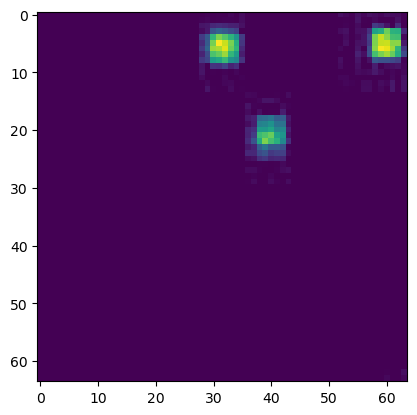

In [18]:
plt.imshow(crop)
crop_fl.shape

In [19]:
p = model2.predict(X_test[2].reshape((1,4096)))
print("Pridicted: ", p)
print(y_test[2])

1/1 [==============================] - 0s 62ms/step
Pridicted:  [[0.01982141 0.04229032]]
[328 282]


[328 282]


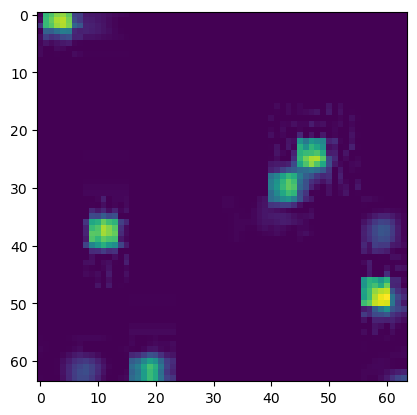

In [20]:
plt.imshow(X_test[2].reshape(64,64))
print(y_test[2])

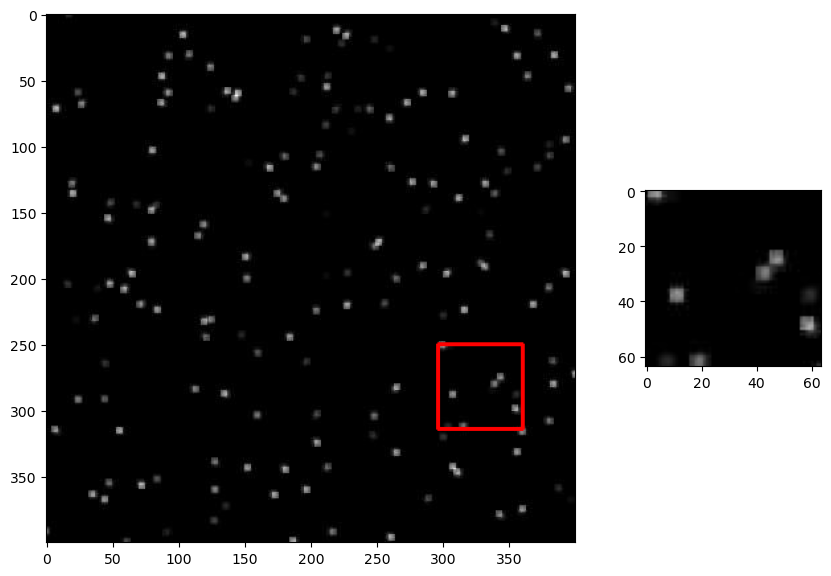

In [21]:
a = get_test_sq(img_arr, (64,64), y_test[2], True)

In [22]:
# cnn2 = tf.keras.Sequential()
# cnn2.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 1)))
# cnn2.add(layers.MaxPooling2D(2,2))
# cnn2.add(layers.Conv2D(64, (3,3), activation='relu'))
# cnn2.add(layers.MaxPooling2D(2,2))
# cnn2.add(layers.Flatten())
# cnn2.add(layers.Dense(2, activation='relu'))
# cnn2.compile(optimizer='SGD', loss='mean_absolute_error')
# cnn2.summary()

In [23]:
X_train = X_train.reshape((-1,64,64,1))
X_test = X_test.reshape((-1,64,64,1))
print("Train shapes: ",X_train.shape, y_train.shape )
print("Test shapes: ",X_test.shape, y_test.shape )

Train shapes:  (19788, 64, 64, 1) (19788, 2)
Test shapes:  (6597, 64, 64, 1) (6597, 2)


In [24]:
a = np.array([[1,2],[3,4], [5,6]])
b = np.array([10,20,30])
np.column_stack([b,a])

array([[10,  1,  2],
       [20,  3,  4],
       [30,  5,  6]])

In [25]:
X_train.shape

(19788, 64, 64, 1)

In [26]:
data_aug = keras.Sequential([layers.experimental.preprocessing.RandomRotation(factor=(-0.25, 0.25), input_shape=(64,64,1)), 
                             layers.experimental.preprocessing.RandomFlip()])
data_aug(X_train[0]).shape

TensorShape([64, 64, 1, 1])

In [27]:
cnn_model = keras.Sequential([
    
    data_aug,
    
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(64,64,1)),
    layers.MaxPool2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(2, activation='relu')
])

cnn_model.compile(optimizer='adam', loss='mean_absolute_error')
# cnn_model.summary()

In [28]:
cnn_model.fit(X_train, y_train, epochs=10)

Epoch 1/10
266/619 [===========>..................] - ETA: 14s - loss: 93.1049

KeyboardInterrupt: 

In [ ]:
cnn_model.evaluate(X_test,y_test)

In [ ]:
crop = np.array(crop, dtype='float64')
crop.dtype
cnn_model.predict(crop.reshape((64,64)))

In [ ]:
# cnn_model.save('Model/cnn_model0')

In [ ]:
cnn_model = tf.keras.models.load_model('Model/cnn_model0')

In [ ]:
cnn_model.evaluate(X_test,y_test)

In [ ]:
plt.imshow(X_test[0])
print(y_test[0])

In [ ]:
pred = cnn_model.predict(X_test)

In [ ]:
pred[0][0]

In [ ]:
pos = 1054
pr = get_test_sq(img_arr, (64,64), (int(pred[pos][0]),int(pred[pos][1])), True)
tr = get_test_sq(img_arr, (64,64), y_test[pos], True)
print('Predicted:', pred[pos])
print('Actual: ', y_test[pos])

In [ ]:
(pred-y_test).min()